In [29]:

%load_ext autoreload
%autoreload 2

import seaborn as sns
import glob
import os
import numpy as np
import sys
sys.path.append( '../src/')

from compile_treeset import compile_folder , compare_treesets


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
import pandas as pd
import tqdm
import itertools
i =0
#cladefolders = ['../CATH_data/' , '../CAT_data/' , '../SCOP_data/' ]
cladefolders = ['../CAT_data/' ]
scorefunc = 'score'
for folder in cladefolders:
    tree_resdf , refcols = compile_folder(folder, scorefunc = scorefunc)
    compare_treesets(tree_resdf , refcols, colfilter= 'sequence' )


../CAT_data/


processed: 1458:   6%|▌         | 89/1465 [00:48<12:28,  1.84it/s]


alntmscore_0_raw_struct_tree sequences
delta: -3016 delta norm: -5.436616473014577 WilcoxonResult(statistic=1055.0, pvalue=0.000105930952488545)


alntmscore_0_exp_struct_tree sequences
delta: -7560 delta norm: -10.01920132079458 WilcoxonResult(statistic=561.0, pvalue=6.142365830126731e-09)


alntmscore_1_exp_struct_tree sequences
delta: -8117 delta norm: -10.273494321760076 WilcoxonResult(statistic=372.5, pvalue=2.5760849939172718e-11)


fident_0_raw_struct_tree sequences
delta: -2205 delta norm: -2.262281964303339 WilcoxonResult(statistic=1393.0, pvalue=0.012638109536003271)


lddt_0_exp_struct_tree sequences
delta: 1499 delta norm: 0.41306395527304485 WilcoxonResult(statistic=1935.5, pvalue=0.7839826549939859)


lddt_1_exp_struct_tree sequences
delta: -884 delta norm: -2.9762295337104385 WilcoxonResult(statistic=1370.0, pvalue=0.021305548722153)


fident_0_exp_struct_tree sequences
delta: -5745 delta norm: -7.050606671200159 WilcoxonResult(statistic=1143.0, pvalue=0.00043714436854139823)


lddt_1_raw_struct_tree sequences
delta: 6459 delta norm: 5.643024449009625 WilcoxonResult(statistic=903.0, pvalue=1.1337192261612465e-05)


fident_1_raw_struct_tree sequences
delta: 6936 delta norm: 5.825196663792313 WilcoxonResult(statistic=482.5, pvalue=8.270448680703405e-10)


fident_1_exp_struct_tree sequences
delta: -6552 delta norm: -8.78955101141954 WilcoxonResult(statistic=589.0, pvalue=7.327443679119607e-09)


alntmscore_1_raw_struct_tree sequences
delta: -1282 delta norm: -2.8085419554255924 WilcoxonResult(statistic=1477.0, pvalue=0.03155118772791824)


lddt_0_raw_struct_tree sequences
delta: 5153 delta norm: 5.001626309270926 WilcoxonResult(statistic=1013.5, pvalue=5.198904015501616e-05)


PlotlyError: Oops! Your data lists or ndarrays should be the same length.

In [49]:
import plotly.figure_factory as ff
#use figure factory to create a distplot of the treescores in tree_resdf
fig = ff.create_distplot([tree_resdf[col] for col in refcols], [col for col in refcols])
fig.show()


<Axes: >

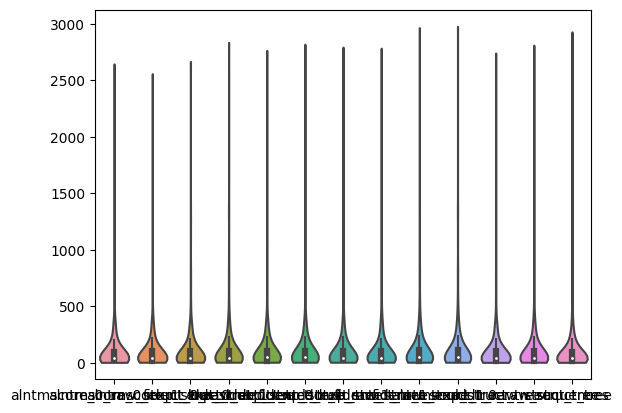

In [26]:
sns.violinplot(tree_resdf[refcols] , cut = 0 )


<Axes: >

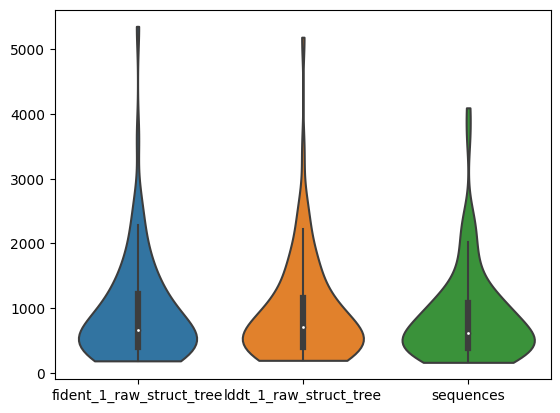

In [22]:
sns.violinplot(tree_resdf[['fident_1_raw_struct_tree', 'lddt_1_raw_struct_tree' , 'sequences' ]] , cut = 0 )


In [18]:
#sns.violinplot(resdf['delta_norm'])
sns.violinplot(tree_resdf[['struct_tree.nwk.PP.nwk.rooted', 'sequences.aln.fst.nwk.rooted']] , cut = 0)
print(tree_resdf['delta'].sum() )
print(tree_resdf['delta_norm'].sum() )

KeyError: "None of [Index(['struct_tree.nwk.PP.nwk.rooted', 'sequences.aln.fst.nwk.rooted'], dtype='object')] are in the [columns]"

In [ ]:
sns.violinplot(tree_resdf['delta'])

In [ ]:
#sub = resdf[['sequences.aln.fst.nwk.rooted' , 'struct_tree.nwk.PP.nwk.rooted' ]]
from matplotlib import pyplot as plt

for folder in tree_resdf.clade.unique():
    print(folder)
    sub = tree_resdf[tree_resdf.clade == folder]
    print(sub.mean())
    
    maxval = sub[['struct_tree.nwk.PP.nwk.rooted', 'sequences.aln.fst.nwk.rooted']].max().max()
    
    sns.scatterplot(sub, x = 'sequences.aln.fst.nwk.rooted', y='struct_tree.nwk.PP.nwk.rooted' , alpha = .25 , s=20 )
    
    sns.scatterplot(sub, x = 'sequences.aln.fst.nwk.rooted', y='core_tree.nwk.PP.nwk.rooted' , alpha = .25 , s=20 , c='r' )
    
    sns.lineplot(x = [0,maxval] , y = [0,maxval] , linestyle='--' , c = 'k')
    
    plt.show()
    sns.violinplot(sub[['struct_tree.nwk.PP.nwk.rooted', 'sequences.aln.fst.nwk.rooted', 'core_tree.nwk.PP.nwk.rooted']] , cut = 0 )
    plt.show()
    sns.violinplot(sub['delta'] , cut = 0 )
    plt.show()
    sns.violinplot(sub['delta_norm'] , cut = 0 )
    plt.show()
    
    print( sub.delta.sum(), wilcoxon(sub.delta))
    print( sub.delta_norm.sum(), wilcoxon(sub.delta_norm))


    

In [32]:
#construct structure and sequence feature dataset

def ret_description(vec , label = ''):
    return { label+'_mean': np.mean(vec) , label+'_max': np.amax(vec) , label+'_min': np.amin(vec) ,label+'_var': np.var(vec) }

allfolders = glob.glob(cladefolders)
dfs = []
print(allfolders)
for clade in allfolders:
    print(clade)
    res = {}
    folders = glob.glob(clade + '*/' )
    for folder in folders:
        if os.path.isfile(folder + 'plddt.json' ) and os.path.isfile(folder + 'sequence_dataset.csv' ) :
            plddt_df = pd.read_json(folder + 'plddt.json').T
            if len(plddt_df)>0:
                try:
                    plddt_df.columns = 'nobs,minmax,mean,variance,skewness,kurtosis'.split(',')
                    plddt_df['min'] = plddt_df.minmax.map( lambda r: r[0] )
                    plddt_df['max'] = plddt_df.minmax.map( lambda r: r[1] )
                    res[folder] = {}
                    for col in ['nobs', 'min' , 'max' , 'mean' , 'variance' , 'skewness' , 'kurtosis' ]:
                        descriptors = ret_description(plddt_df[col] , label = col)
                        for l in descriptors:
                            res[folder][l] = descriptors[l]
                    #add in some descriptors of the taxonomic spread and sequence set
                    seqdf = pd.read_csv(folder+'sequence_dataset.csv' )
                    res[folder]['nprots'] = len(seqdf)
                    cladesets = [ set(l.split(',')) for l in  seqdf['Taxonomic lineage (Ids)'] ]
                    union_all = cladesets[0]
                    intersection_all = cladesets[0]
                    for c in cladesets:
                        union_all = union_all.union(c)
                        intersection_all.intersection(c)
                    res[folder]['n_clades'] = len(union_all)
                    res[folder]['inter_clades'] = len(intersection_all)
                    res[folder]['inter/nc'] =  res[folder]['inter_clades'] /  res[folder]['n_clades'] 
                    res[folder]['nc/np'] = res[folder]['nprots'] / res[folder]['n_clades']
                except:
                    pass
    resdf = pd.DataFrame.from_dict(res, orient = 'index')
    dfs.append(resdf)
seqset_resdf = pd.concat(dfs)



['/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Bacteria/', '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/', '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Euteleostomi/', '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Eumetazoa/', '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Chordata/', '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Tetrapoda/', '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Opisthokonta/', '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Dikarya/', '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Fungi/', '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Bilateria/', '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Eukaryota/']
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Bacteria/
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Tre

In [33]:
print(seqset_resdf)
seqset_resdf.to_csv('structure_and_sequence_qcmetrics.csv')

                                                      nobs_mean  nobs_max  \
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...   807.250000       985   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...   521.944444       811   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...   401.434783       516   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...    64.357143        71   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...   204.133333       215   
...                                                         ...       ...   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...  1041.034884      1191   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...   446.782609       581   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...   351.106061       480   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...   384.966102       506   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...   890.472222      1124   

                                                    nobs_min     nobs_var  

In [34]:
#add to the tree comparison data
tree_resdf = tree_resdf.merge( seqset_resdf , left_index = True, right_index = True, how = 'inner' )
print(tree_resdf)

                                                    struct_tree.nwk.PP.nwk.rooted  \
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                             52   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                             76   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                            141   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                             33   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                             59   
...                                                                           ...   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                           1022   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                            123   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                            642   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                            660   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...               

In [35]:
print(tree_resdf.columns)

Index(['struct_tree.nwk.PP.nwk.rooted', 'core_tree.nwk.PP.nwk.rooted',
       'sequences.aln.fst.nwk.rooted', 'delta', 'max', 'delta_norm', 'clade',
       'HOG', 'nobs_mean', 'nobs_max', 'nobs_min', 'nobs_var', 'min_mean',
       'min_max', 'min_min', 'min_var', 'max_mean', 'max_max', 'max_min',
       'max_var', 'mean_mean', 'mean_max', 'mean_min', 'mean_var',
       'variance_mean', 'variance_max', 'variance_min', 'variance_var',
       'skewness_mean', 'skewness_max', 'skewness_min', 'skewness_var',
       'kurtosis_mean', 'kurtosis_max', 'kurtosis_min', 'kurtosis_var',
       'nprots', 'n_clades', 'inter_clades', 'inter/nc', 'nc/np'],
      dtype='object')


In [36]:
#try to predict the delta using these features w gradient boosted trees
#try to predict the RF distance as well

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [43]:
X, y = tree_resdf[['nobs_mean', 'nobs_max',
       'nobs_min', 'nobs_var', 'min_mean', 'min_max', 'min_min', 'min_var',
       'max_mean', 'max_max', 'max_min', 'max_var', 'mean_mean', 'mean_max',
       'mean_min', 'mean_var', 'variance_mean', 'variance_max', 'variance_min',
       'variance_var', 'skewness_mean', 'skewness_max', 'skewness_min',
       'skewness_var', 'kurtosis_mean', 'kurtosis_max', 'kurtosis_min',
       'kurtosis_var', 'nprots', 'n_clades', 'inter_clades', 'inter/nc',
       'nc/np']], tree_resdf.delta_norm

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=13
)

params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}


reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

The mean squared error (MSE) on test set: 0.0042


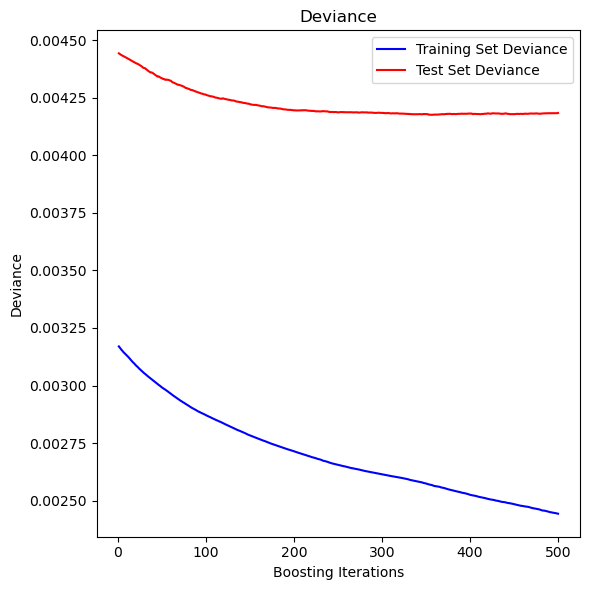

In [44]:
fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

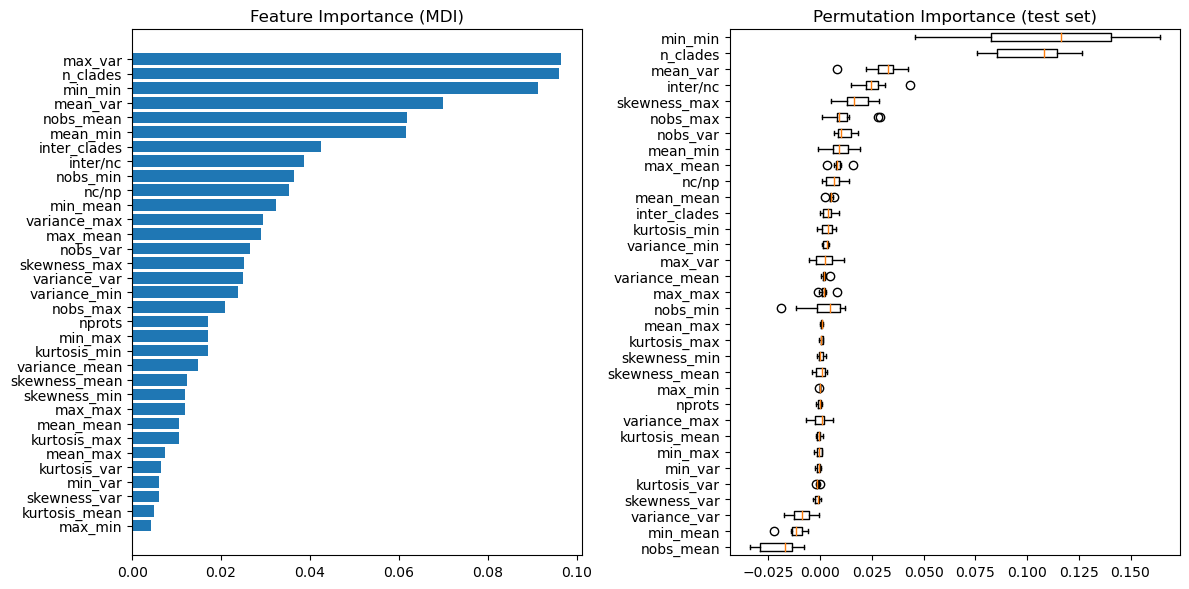

In [45]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(X.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()